In [38]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a column matrix of X


In [39]:
X = torch.linspace(1, 50,50).reshape(-1,1)
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

# Create a "random" array of error values
we cant 50 random integer values that collectively cancel each other out

In [40]:
torch.manual_seed(71)
error = torch.randint(-8, 9, (50,1), dtype=torch.float)

print(error.sum())
print(error)

tensor(0.)
tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])


# Create a column matrix of y values
here weight = 2, bias = 1, plus the error amount. y will have the same shape as X and error.


In [41]:
y = 2*X + 1 + error
print(y)

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])


# Plotting the result
We have to conver tensors to Numpy array just for plotting.


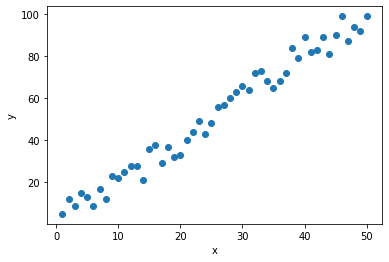

In [42]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel("y")
plt.xlabel("x");

Note that when we created tensor X, we did not pass requires_grid = True. This means that y doesn't have a gradient function, and y.backward() won't work. Meaning pytorch is not tracking operations, it doesn't know the relationship between X and y.

# Simple linear model

nn.Linear() model preselects weight and bias values at random.


In [43]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


So this means, that the models sets a random weight of 0.1060 and a bias of 0.90 without seeing any data. Let's see how that changes.

# Model classes
Pytorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a asingle linear layer.

In [44]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

NOTE: The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.


When Model is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).
As above, we can see the initial hyperparameters.


In [45]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [46]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


Now let's see the results when we pass a tensor into the model.


In [47]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


which is confirmed with 𝑓(𝑥)=(0.1060)(2.0)+(0.9638)=1.1758


# Plot the initial model
we can plot the untrained model against our dataset to get an idea of our starting point.

In [48]:
x1 = np.array([X.min(),X.max()])
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = x1*w1 + b1

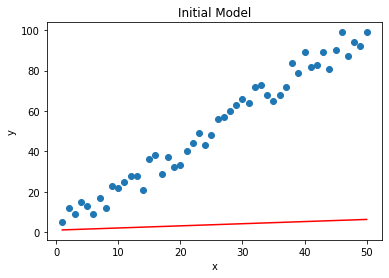

In [49]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

# Set the loss function
𝑀𝑆𝐸=1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2=1𝑛∑𝑖=1𝑛(𝑦𝑖−(𝑤𝑥𝑖+𝑏))2

In [50]:
linear_loss_func = nn.MSELoss()

# Set the optimization
Here we'll use Stochastic Gradient Descent (SGD) with an applied learning rate (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

In [51]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) 

# Training the model
An epoch is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of weight=2,bias=1

Let's walk through the steps we're about to take:

    Set a reasonably large number of passes
    epochs = 50
    Create a list to store loss values. This will let us view our progress afterward.
    losses = []
    for i in range(epochs):
    Bump "i" so that the printed report starts at 1
        i+=1
    Create a prediction set by running "X" through the current model parameters
        y_pred = model.forward(X)
    Calculate the loss
        loss = criterion(y_pred, y)
    Add the loss value to our tracking list
        losses.append(loss)
    Print the current line of results
        print(f'epoch: {i:2} loss: {loss.item():10.8f}')
    Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.
        optimizer.zero_grad()
    Now we can backprop
        loss.backward()
    Finally, we can update the hyperparameters of our model
        optimizer.step()



In [52]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = linear_loss_func(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
losses

epoch:  1  loss: 3057.21679688  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1588.53112793  weight: 3.33490038  bias: 1.06046367
epoch:  3  loss: 830.29998779  weight: 1.01483274  bias: 0.99226284
epoch:  4  loss: 438.85241699  weight: 2.68179965  bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119  bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592  bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538  bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409  bias: 1.03025162
epoch:  9  loss: 36.40125656  weight: 1.85124564  bias: 1.02149546
epoch: 10  loss: 28.98922920  weight: 2.08060074  bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838  bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562  bias: 1.02911627
epoch: 13  loss: 22.16612625  weight: 1.94905841  bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213  bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372  bias

[tensor(3057.2168, grad_fn=<MseLossBackward>),
 tensor(1588.5311, grad_fn=<MseLossBackward>),
 tensor(830.3000, grad_fn=<MseLossBackward>),
 tensor(438.8524, grad_fn=<MseLossBackward>),
 tensor(236.7615, grad_fn=<MseLossBackward>),
 tensor(132.4291, grad_fn=<MseLossBackward>),
 tensor(78.5657, grad_fn=<MseLossBackward>),
 tensor(50.7578, grad_fn=<MseLossBackward>),
 tensor(36.4013, grad_fn=<MseLossBackward>),
 tensor(28.9892, grad_fn=<MseLossBackward>),
 tensor(25.1624, grad_fn=<MseLossBackward>),
 tensor(23.1865, grad_fn=<MseLossBackward>),
 tensor(22.1661, grad_fn=<MseLossBackward>),
 tensor(21.6391, grad_fn=<MseLossBackward>),
 tensor(21.3668, grad_fn=<MseLossBackward>),
 tensor(21.2259, grad_fn=<MseLossBackward>),
 tensor(21.1529, grad_fn=<MseLossBackward>),
 tensor(21.1150, grad_fn=<MseLossBackward>),
 tensor(21.0952, grad_fn=<MseLossBackward>),
 tensor(21.0847, grad_fn=<MseLossBackward>),
 tensor(21.0790, grad_fn=<MseLossBackward>),
 tensor(21.0758, grad_fn=<MseLossBackward>),
 t

# Plot the results of losses

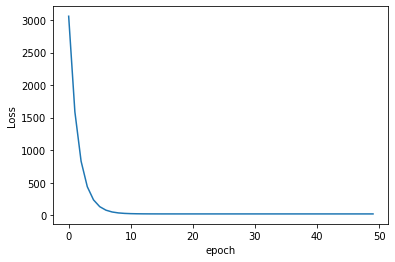

In [64]:
fi_los = [fl.item() for fl in losses ]
plt.plot(range(epochs), fi_los)
plt.ylabel('Loss')
plt.xlabel('epoch');

# Final results

In [35]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98277164, Current bias: 1.09101629

[ 1. 50.]
[  3.073788 100.2296  ]


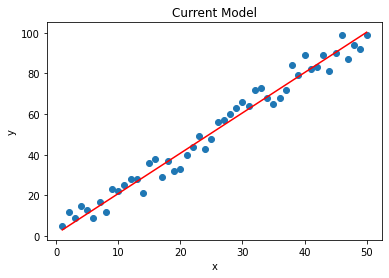

In [36]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

# Finish.